# Bagging y Random Forest

Vamos a analizar el funcionamiento de los métodos de Bagging ([clasificación](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)/[regresión](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)) y de Random Forest ([clasificación](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)/[regresión](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) mediante ejemplos ilustrativos. 

## Contenidos

1. Ejemplo en clasificación
2. Ejemplo en regresión

## Librerías y funciones

Lo primero es cargar las librerías y funciones necesarias.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

# 1. Ejemplo en clasificación

En este primer ejemplo vamos a explorar el conjunto de datos para la detección de cancer de mama ([Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)). 

El objetivo es detectar si un cancer es benigno o maligno (B/N) a partir de la información de atributos numéricos que caracterizan los núcleos celulares de las imágenes digitalizadas de biopsias realizadas a distintos pacientes. 

La variable target es *diagnosis*, mientras que *id* es irrelevante

<div class = "alert alert-success">
EJERCICIO: Cargue los datos almacenados en el fichero *breast_cancer.csv* y elimine las columnas *id* y *Unnamed: 32*
</div>

In [2]:
# Tu código aquí
data = pd.read_csv("./data/breast_cancer.csv") # cargamos fichero

data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.head()                                 # visualizamos 5 primeras filas

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


En primer lugar vemos cómo se distribuye la variable *diagnosis*

In [3]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Convertimos ahora *diagnosis* en una variable numérica. Aquí tenemos varias opciones:

In [5]:
# opción 1. np.where
data['label_opcion1'] = np.where(data['diagnosis'] == 'M',1,0)


# opción 2. LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['diagnosis'])

print(list(le.classes_))

data['label_opcion2'] = le.transform(data['diagnosis'])

data.head(20)

# hay muchas más opciones: onehot, ordinal, mean... 

['B', 'M']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label_opcion1,label_opcion2
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1,1
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1,1
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1,1
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1,1


En primer lugar conviene echar un vistazo a los datos. Como todos los datos son numéricos, un histograma puede ser una buena opción

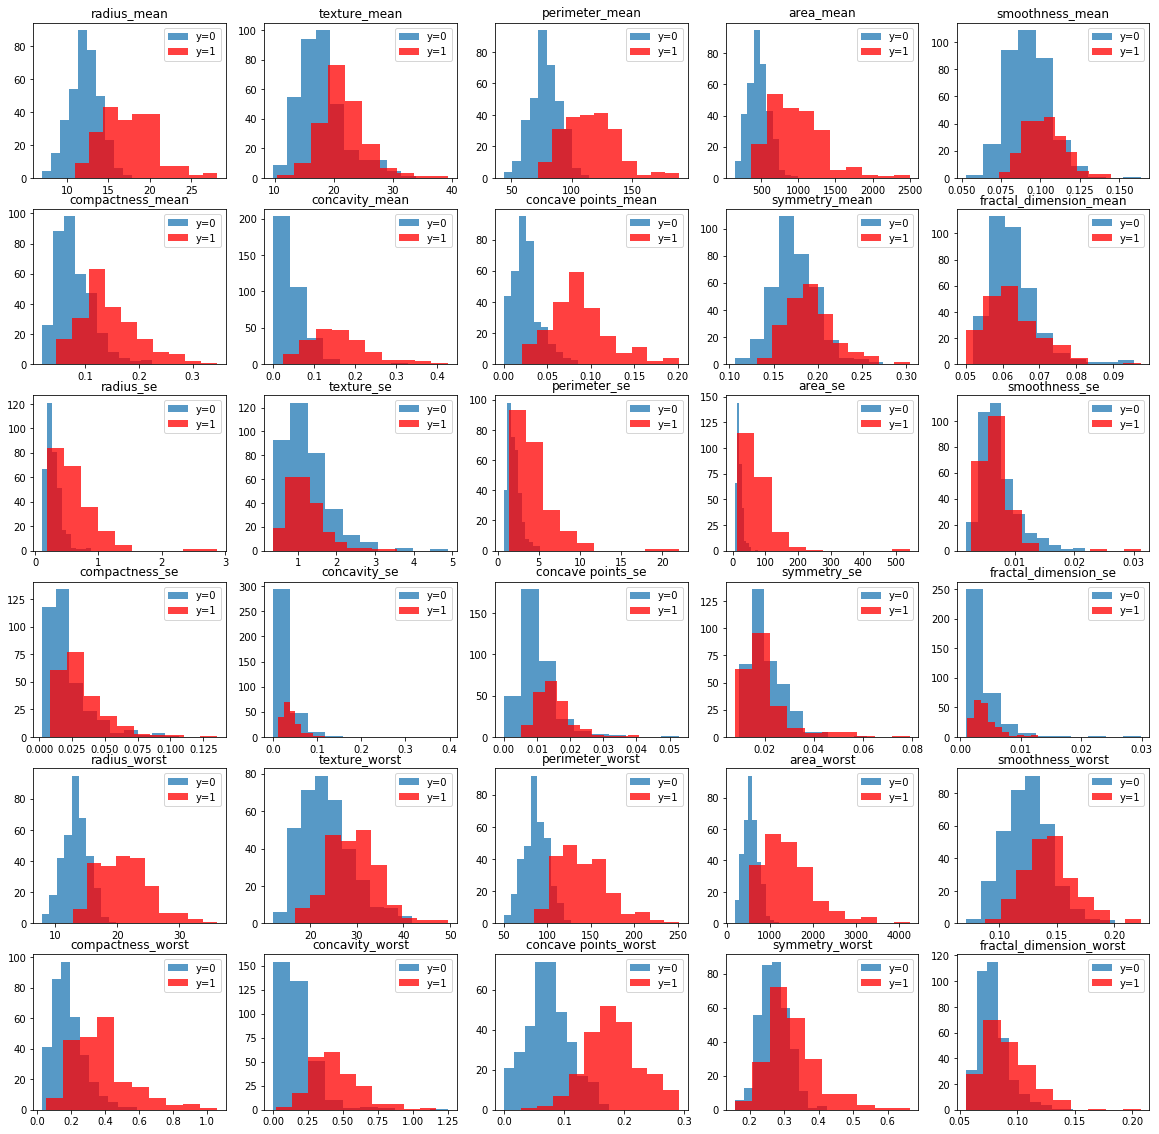

In [6]:
data = pd.read_table('./data/breast_cancer.csv',sep=',', decimal='.')
data =  data.drop(['id','Unnamed: 32'],axis=1)
data['diagnosis'] = np.where(data['diagnosis'] == 'M',1,0)

# Pintamos histogramas para cada clase
plt.figure(figsize=(20,20))

idx_0 =  data['diagnosis'] == 0
idx_1 =  data['diagnosis'] == 1

for i,feature in enumerate(data.columns.drop(['diagnosis'])):
    plt.subplot(6,5,i+1)   
    plt.hist(data.loc[idx_0,feature],density=0, alpha=0.75,label='y=0')
    plt.hist(data.loc[idx_1,feature],density=0, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

A la vista de los histogramas anteriores, podemos hacer transformaciones sobre las variables, para que el histograma se parezca más a una gaussiana. Esto se conoce como transformación de variables, y no modifican el resultado de la clasificación. Cuando tenemos distribuciones asimétricas (como por ejemplo *area_se*), podemos aplicar una transformación logarítmica o raíz cuadrada. ¡Cuidado! para transformar una variable hay que conocer el margen dinámico de la misma (no podemos aplicar logaritmos a valores negativos)

In [7]:
features_to_transform = ['radius_se','perimeter_se','area_se','compactness_se']

for feature in features_to_transform:
    data[feature] = data[feature].apply(lambda x: np.log10(x))

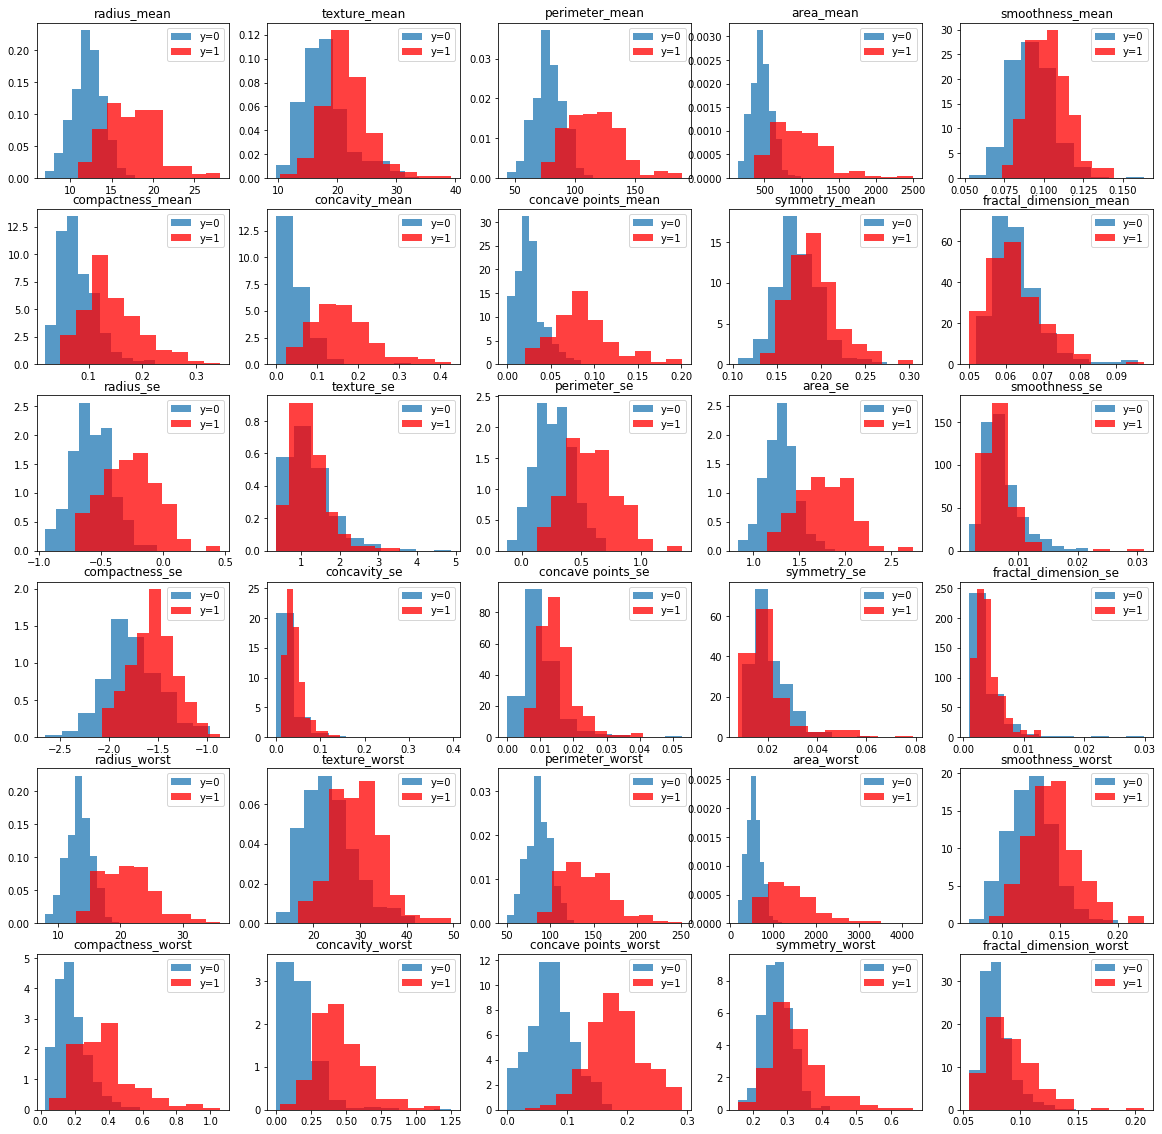

In [8]:
# Pintamos de nuevo histogramas para cada clase
plt.figure(figsize=(20,20))

idx_0 =  data['diagnosis'] == 0
idx_1 =  data['diagnosis'] == 1

for i,feature in enumerate(data.columns.drop(['diagnosis'])):
    plt.subplot(6,5,i+1)   
    plt.hist(data.loc[idx_0,feature],normed=1, alpha=0.75,label='y=0')
    plt.hist(data.loc[idx_1,feature],normed=1, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# preparamos los datos
features = data.columns.drop(['diagnosis'])
X = data[features].values
y = data['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, shuffle=True, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (455, 30)
Datos test:   (114, 30)


## 1.1 Árbol de decisión individual

En primer lugar entrenamos un árbol individual para hacernos una idea de las prestaciones que alcanzamos.

best mean cross-validation score: 0.938
best parameters: {'max_depth': 5}


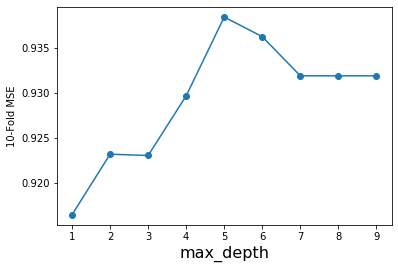

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [11]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo-3).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.9516483516483516
Test:  0.9210526315789473


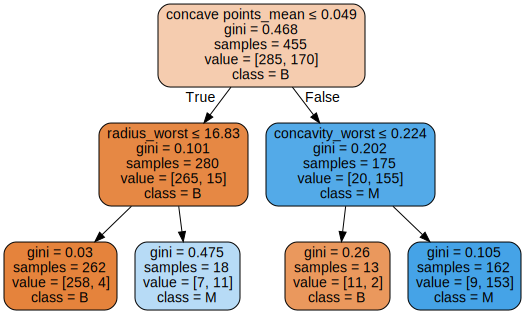

In [12]:
from sklearn.tree import export_graphviz
import graphviz

tree_dot = export_graphviz(treeModel, out_file=None, feature_names=features, class_names=['B','M'],  
                         filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(tree_dot) 
graph

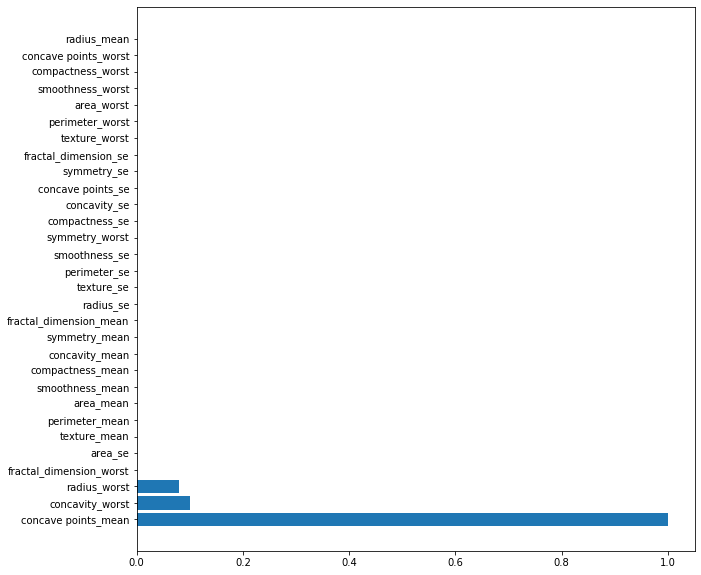

In [13]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

# 1.2 Bagging y Random Forest

Los parámetros libres de Bagging y Random forest son dos:

- Número de árboles construidos: aquí hemos de asegurarnos que la función de coste es estable para el número de árboles elegido
- Complejidad de los mismos (normalmente max_depth o min_samples_leaf)


best mean cross-validation score: 0.963
best parameters: {'max_depth': 6}


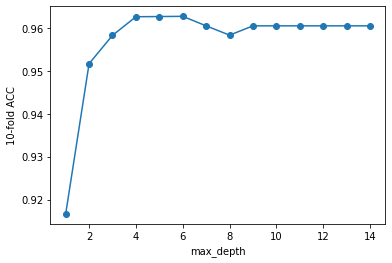

In [14]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [15]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo-4,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.967032967032967
Test:  0.9473684210526315


# 1.3 Importancia variables


Una propiedad muy interesante de los algoritmos basados en árboles es que podemos medir la importancia de las variables

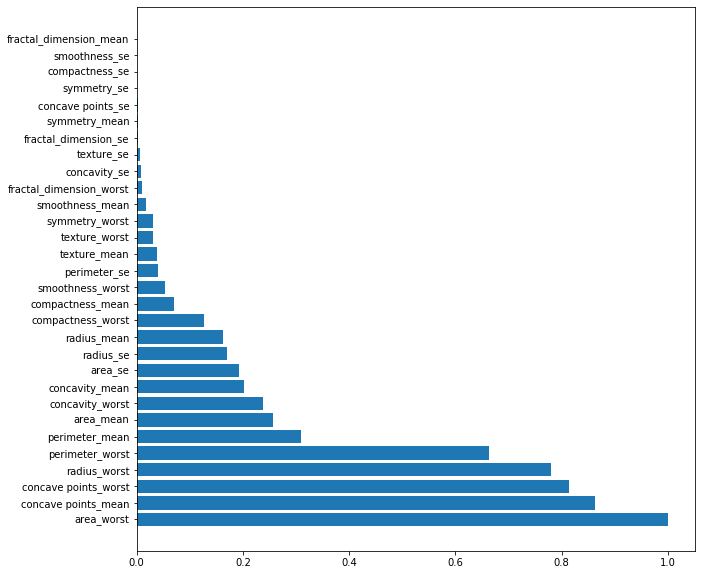

In [16]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Utilizando este ranking, podemos hacer selección de características

In [17]:
from sklearn.model_selection import KFold

N,Nfeatures = X_train.shape

rf = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train):
        
        Xt = X_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = X_train[idxVal,:]
        yv = y_train[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.1273913043478261 +/- 0.03873543703736502
# features 2 error 0.08777777777777779 +/- 0.0415403040841548
# features 3 error 0.0746376811594203 +/- 0.027851613693881703
# features 4 error 0.05932367149758453 +/- 0.025817900388870267
# features 5 error 0.05705314009661835 +/- 0.03248981730373486
# features 6 error 0.05265700483091786 +/- 0.031123261047570176
# features 7 error 0.04608695652173912 +/- 0.026624625545352422
# features 8 error 0.05043478260869564 +/- 0.03083563942851201
# features 9 error 0.05043478260869564 +/- 0.03376199898983177
# features 10 error 0.05265700483091786 +/- 0.034024892285786826
# features 11 error 0.05053140096618356 +/- 0.024171202016683352
# features 12 error 0.04821256038647341 +/- 0.025290028099016384
# features 13 error 0.05048309178743959 +/- 0.03384694964651031
# features 14 error 0.0459903381642512 +/- 0.03566696471270455
# features 15 error 0.043768115942028986 +/- 0.032181455934955645
# features 16 error 0.04159420289855072 +/- 

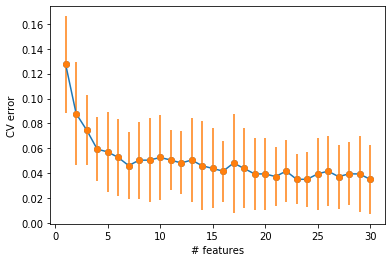

In [18]:
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

<div class = "alert alert-success">
EJERCICIO: Entrena un algoritmo de Random Forest con las características seleccionadas.
</div>

In [19]:
# Tu código aquí
selected_features = indices[0:8]

maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo-2,n_estimators=200,max_features='sqrt')
bagModel.fit(X_train[:, selected_features],y_train)

print("Train: ",bagModel.score(X_train[:, selected_features],y_train))
print("Test: ",bagModel.score(X_test[:, selected_features],y_test))

Train:  0.978021978021978
Test:  0.9473684210526315


# 2. Ejemplo en regresión

In [20]:
# cargamos datos
house_data = pd.read_csv("./data/kc_house_data.csv") # cargamos fichero

# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)

# convertir las variables en pies al cuadrado en metros al cuadrado 
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# añadimos las nuevas variables
house_data['years']            = 2017 - house_data['yr_built']
house_data['bedrooms_squared'] = house_data['bedrooms'].apply(lambda x: x**2)
house_data['bed_bath_rooms']   = house_data['bedrooms']*house_data['bathrooms']
house_data['log_sqm_living']   = house_data['sqm_living'].apply(lambda x: np.log(x))
house_data['lat_plus_long']    = house_data['lat']*house_data['long']

house_data.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,...,zip_code,lat,long,sqm_living15,sqm_lot15,years,bedrooms_squared,bed_bath_rooms,log_sqm_living,lat_plus_long
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,...,98178,47.5112,-122.257,124.490074,524.902176,62,9,3.00,4.697071,-5808.576778
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,...,98125,47.7210,-122.319,157.006138,709.686323,66,9,6.75,5.475462,-5837.184999
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,...,98028,47.7379,-122.233,252.696269,748.984308,84,4,2.00,4.270192,-5835.146731
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,...,98136,47.5208,-122.393,126.348134,464.515200,52,16,12.00,5.204501,-5816.213274
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,...,98074,47.6168,-122.045,167.225472,697.051509,30,9,6.00,5.050350,-5811.392356


In [21]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data.values 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = house_data.columns[1:]

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (16209, 23)
Datos test:  (5404, 23)


## 2.1 Árbol de decisión

<div class = "alert alert-success">
EJERCICIO: Entrena un árbol de decisión y devuelve las prestaciones para el conjunto de test
</div>

best mean cross-validation score: 0.774
best parameters: {'max_depth': 9}


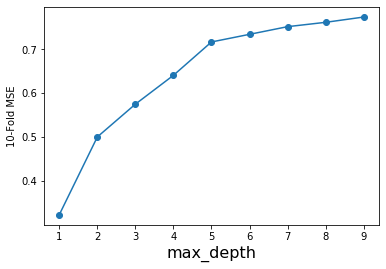

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Tu código aquí
maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [23]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.8875679844340707
Test:  0.7868587617964586


# 2.2 Random forest

<div class = "alert alert-success">
EJERCICIO: Entrena un algoritmo de random forest y devuelve las prestaciones para el conjunto de test
</div>

best mean cross-validation score: 0.858
best parameters: {'max_depth': 14}


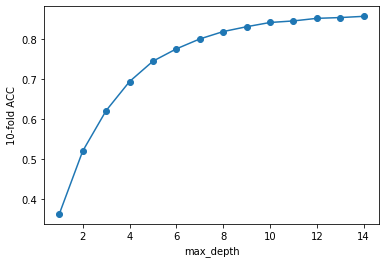

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Tu código aquí
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [25]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.9630036943577522
Test:  0.8596795788584392


<div class = "alert alert-success">
EJERCICIO: ¿Qué características son las más relevantes? ¿Coinciden este ranking de características con las variables importante seleccionadas por el algoritmo Lasso?
</div>

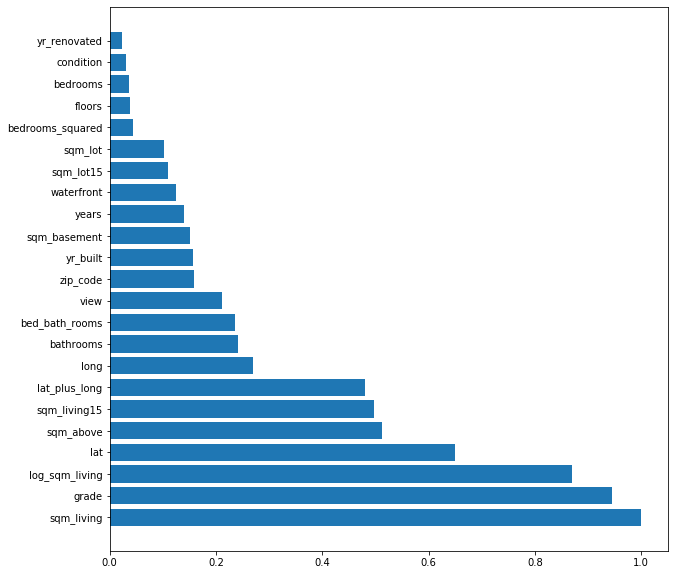

In [26]:
# Tu código aquí
features = house_data.columns.drop(['price'])

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()